In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_json('output/output_small.jsonl', lines=True)
df.head(1)

,left,right,label,match,match_confidence
0,COL name VAL sony pink cyber-shot 7.2 megapixe...,COL name VAL olympus fe-360 digital camera pin...,0,0,0.999437


In [27]:
for level in range(90, 100):
    print(f'Samples < {level}% confidence:', (df['match_confidence'] < level/100).sum())

Samples < 90% confidence: 158
Samples < 91% confidence: 162
Samples < 92% confidence: 173
Samples < 93% confidence: 178
Samples < 94% confidence: 189
Samples < 95% confidence: 206
Samples < 96% confidence: 226
Samples < 97% confidence: 250
Samples < 98% confidence: 275
Samples < 99% confidence: 303


Samples < 95% confidence: 206


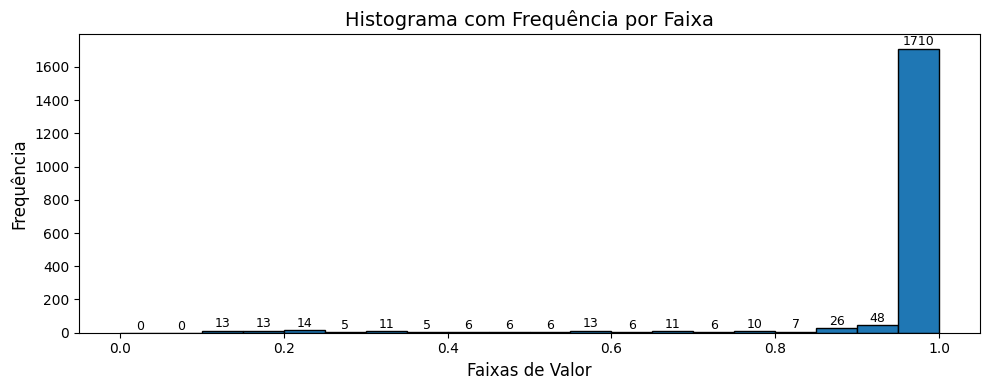

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(df['match_confidence'], bins=np.arange(0, 1.05, 0.05), edgecolor='black')

# Adicionando rótulos de frequência em cada barra
for count, patch in zip(n, patches):
    # Pega o centro da barra
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.text(x, y + 0.5, int(count), ha='center', va='bottom', fontsize=9)

# Personalizando o gráfico
ax.set_title('Histograma com Frequência por Faixa', fontsize=14)
ax.set_xlabel('Faixas de Valor', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
confidence = 95
df[df['match_confidence'] >= confidence/100].to_json(f'output/mte{confidence}.jsonl', orient='records', lines=True)
df[df['match_confidence'] < confidence/100].to_json(f'output/lt{confidence}.jsonl', orient='records', lines=True)